### Handling Sequences with PyTorch

Sequential data
- Ordered in time or space
- Order of the data points contains dependencies between them
- Examples of sequential data:
  - Time series
  - Text
  - Audio waves

#### Electricity Consumption Prediction
Task: predict future electricity consumption based on past patterns

#### Test-train Split
- No random splitting for time series!
- Look-ahead bias: model has info about the future
- Solution: split by time

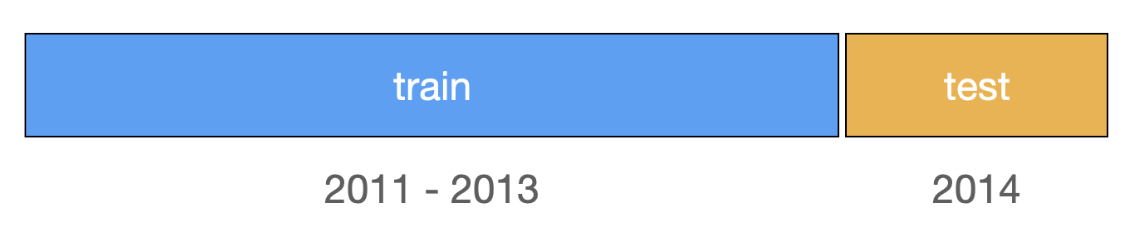

#### Creating Sequences
- Sequence length = number of data points in one training example 
  - 24 × 4 = 96 -> consider last 24 hours<br><br>
- Predict single next data point

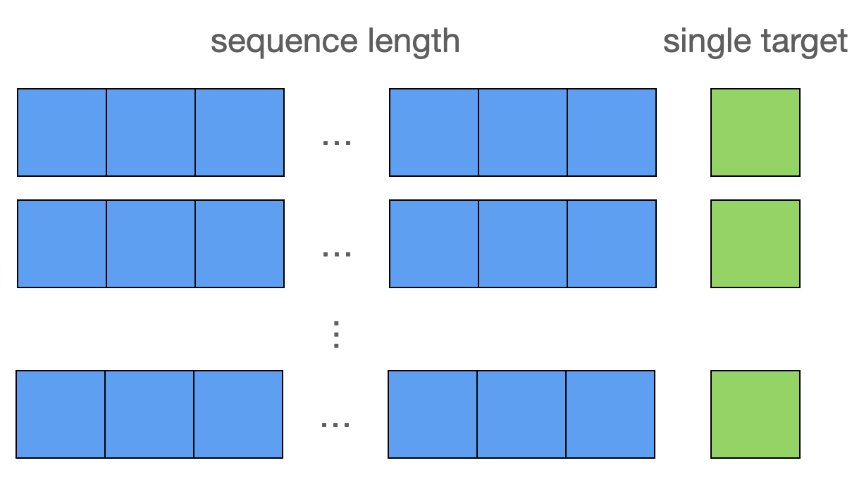

#### Creating Sequences in Python

In [1]:
import numpy as np
import pandas as pd
import torch

df = pd.read_csv('electricity_consump/electricity_train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105215 entries, 0 to 105214
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   timestamp    105215 non-null  object 
 1   consumption  105215 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [2]:
df.head(10)

,timestamp,consumption
0,2011-01-01 00:15:00,-0.704319
1,2011-01-01 00:30:00,-0.704319
2,2011-01-01 00:45:00,-0.678983
3,2011-01-01 01:00:00,-0.653647
4,2011-01-01 01:15:00,-0.704319
5,2011-01-01 01:30:00,-0.704319
6,2011-01-01 01:45:00,-0.729908
7,2011-01-01 02:00:00,-0.704319
8,2011-01-01 02:15:00,-0.704319
9,2011-01-01 02:30:00,-0.678983


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Extract the column with the consumption values 
values = df.iloc[:, 1].values.reshape(-1, 1)

# Normalize the values
scaler = MinMaxScaler()
values_normalized = scaler.fit_transform(values)

# Define the sequence length
seq_length = 24 

def create_sequences(df, seq_length):    
    xs, ys = [], []
    for i in range(len(df) - seq_length):        
        x = df.iloc[i:(i+seq_length), 1]        
        y = df.iloc[i+seq_length, 1]        
        xs.append(x)       
        ys.append(y)
    
    return np.array(xs), np.array(ys)

- Take data and sequence length as inputs
- Initialize inputs and targets lists
- Iterate over data pointsDefine inputs and target
- Append to pre-initialized listsReturn inputs and targets as NumPy arrays

### Tensor Dataset

Create training examples

In [4]:
# Prepare the training data
X_train, y_train = create_sequences(values_normalized, seq_length)

# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (105191, 24)
y_train shape: (105191,)


In [5]:
# Convert them to a Torch Dataset

from torch.utils.data import TensorDataset

dataset_train = TensorDataset(    
    torch.from_numpy(X_train).float(),    
    torch.from_numpy(y_train).float(),
)

### Applicability to other sequential data

Same techniques are applicable to other sequences:
- Large Language Models
- Speech recognition

In [6]:
# training ver 1

def create_sequences(df, seq_length):
    xs, ys = [], []
    # Iterate over data indices
    for i in range(len(df) - seq_length):
      	# Define inputs
        x = df.iloc[i:(i+seq_length), 1]
        # Define target
        y = df.iloc[i+seq_length, 1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [7]:
# training ver 2

import torch
from torch.utils.data import TensorDataset

train_data = pd.read_csv('electricity_consump/electricity_train.csv')

# Use create_sequences to create inputs and targets
X_train, y_train = create_sequences(train_data, 96)
print(X_train.shape, y_train.shape)

# Create TensorDataset
dataset_train = TensorDataset(
    torch.from_numpy(X_train).float(),
    torch.from_numpy(y_train).float(),
)
print(len(dataset_train))

(105119, 96) (105119,)
105119


### Recurrent Neural Networks

#### Recurrrent Neuron

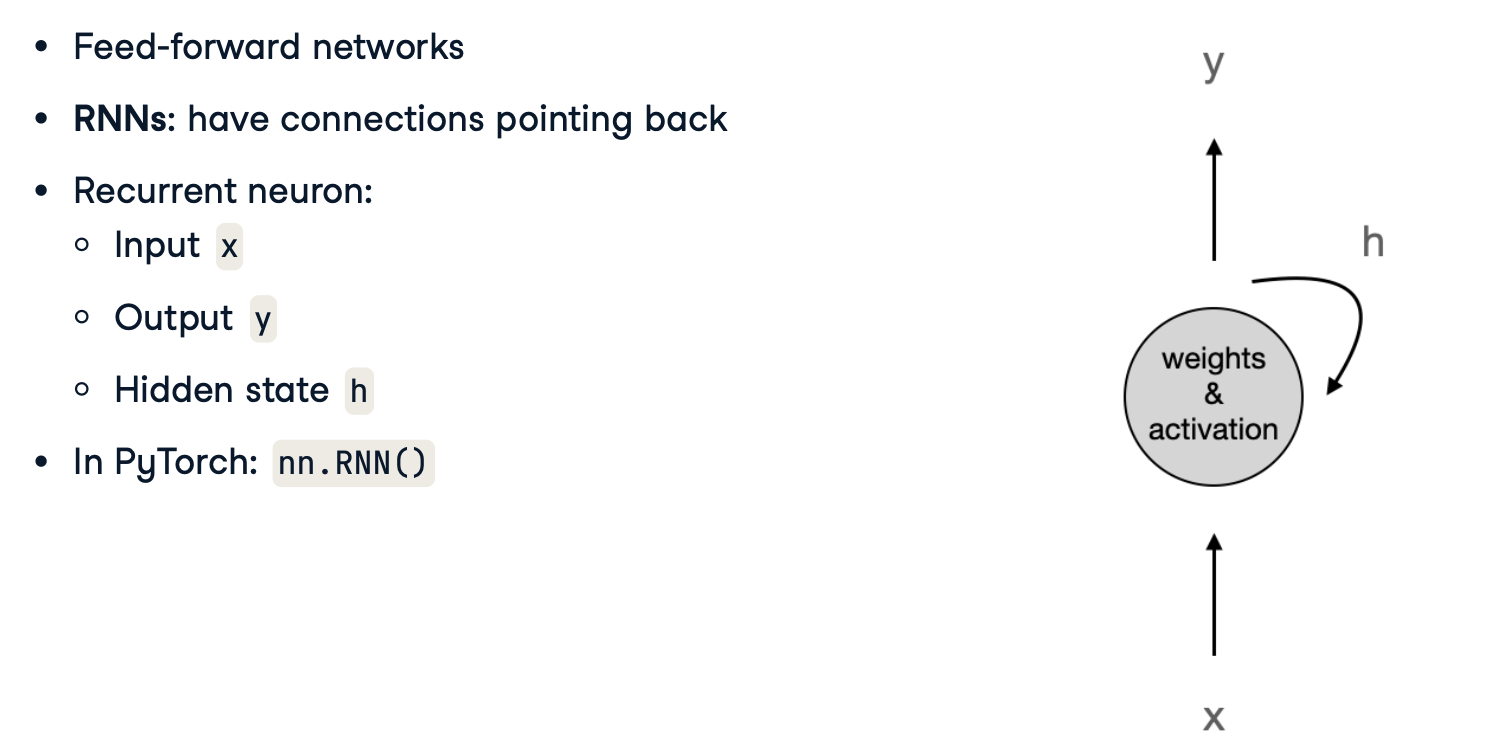

#### Unrolling recurrent neuron through time

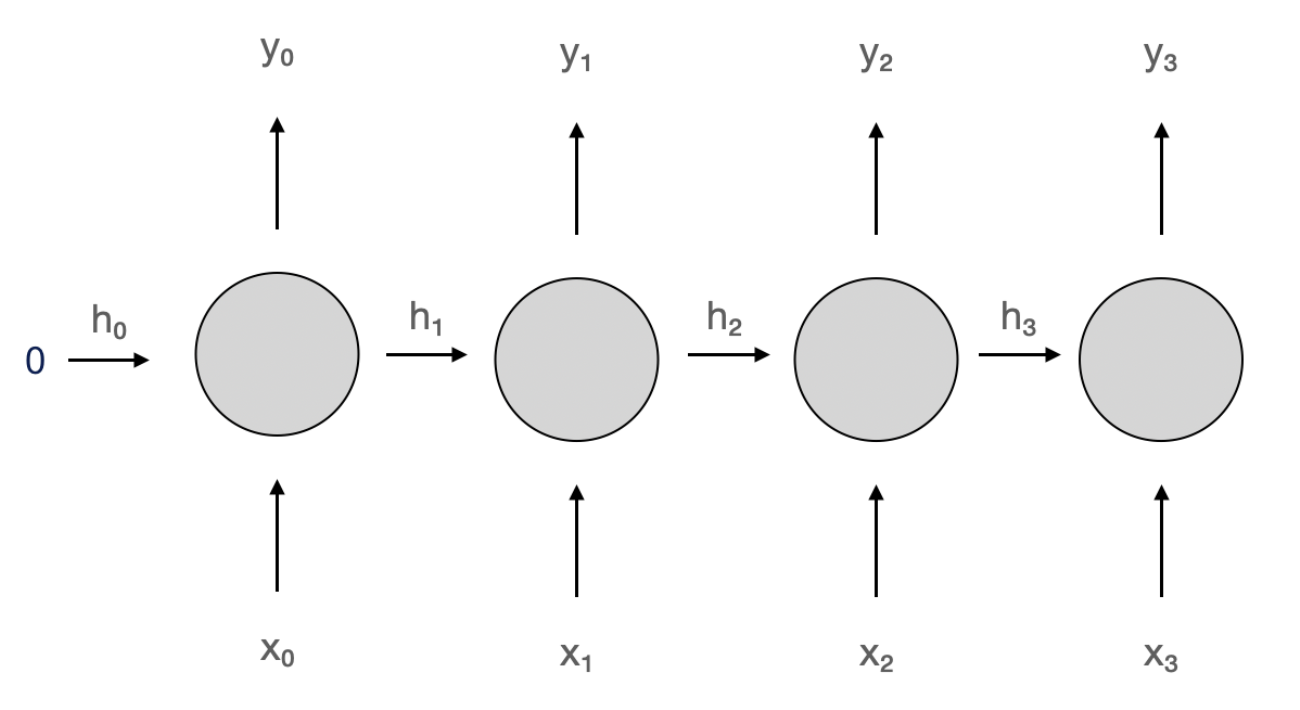

#### Deep RNNs

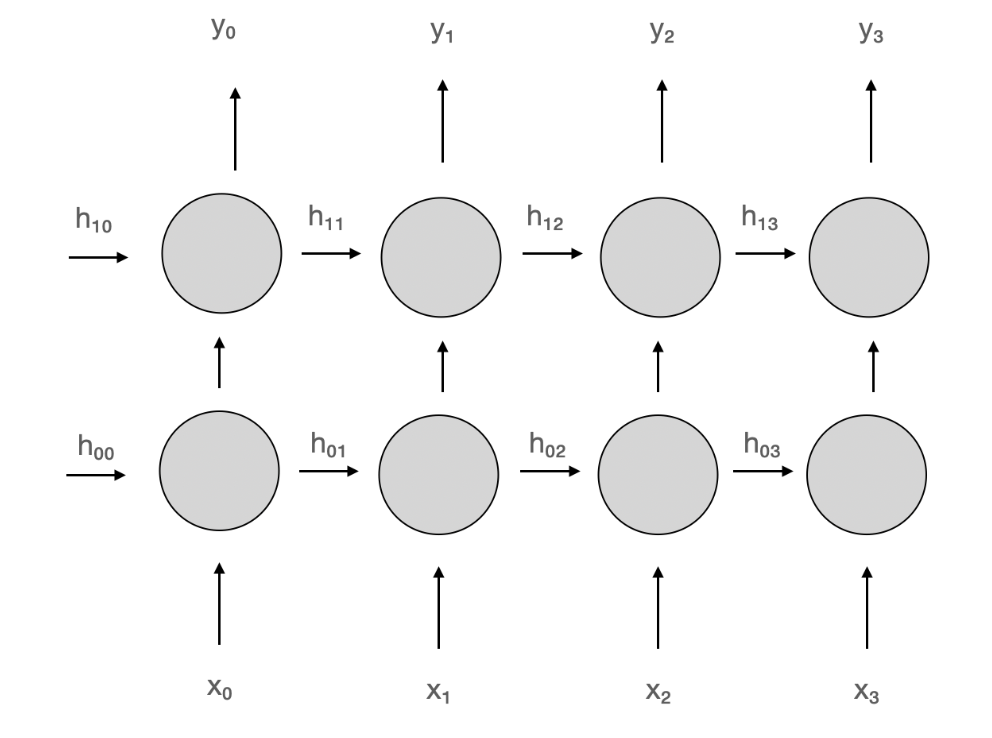

#### Sequence-to-sequence architecture
Pass sequence as input, use the entire output sequence
- Example: **Real-time speech recognition**

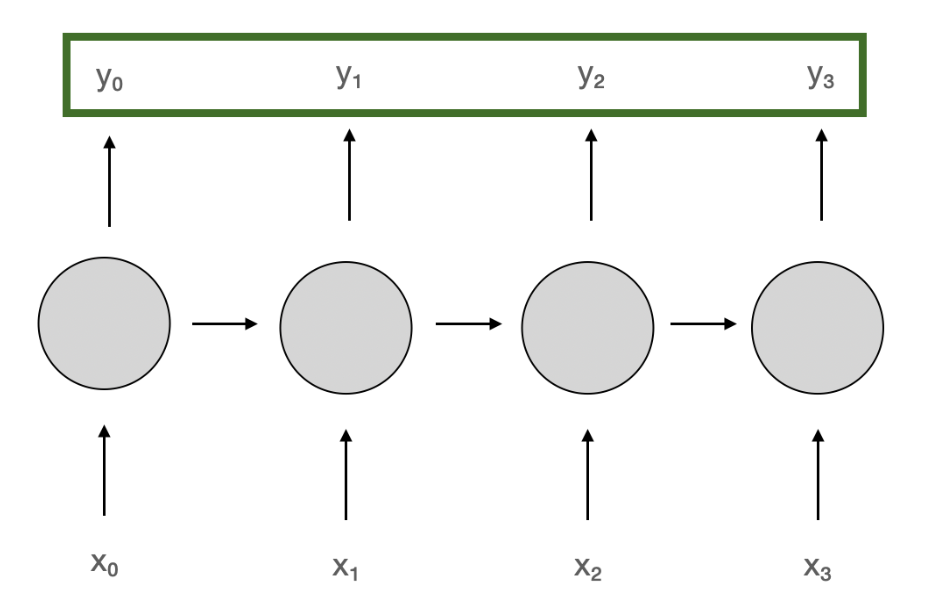

#### Sequence-to-vector architecture
Pass sequence as input, use only the last output
- Example: **Text topic classification**

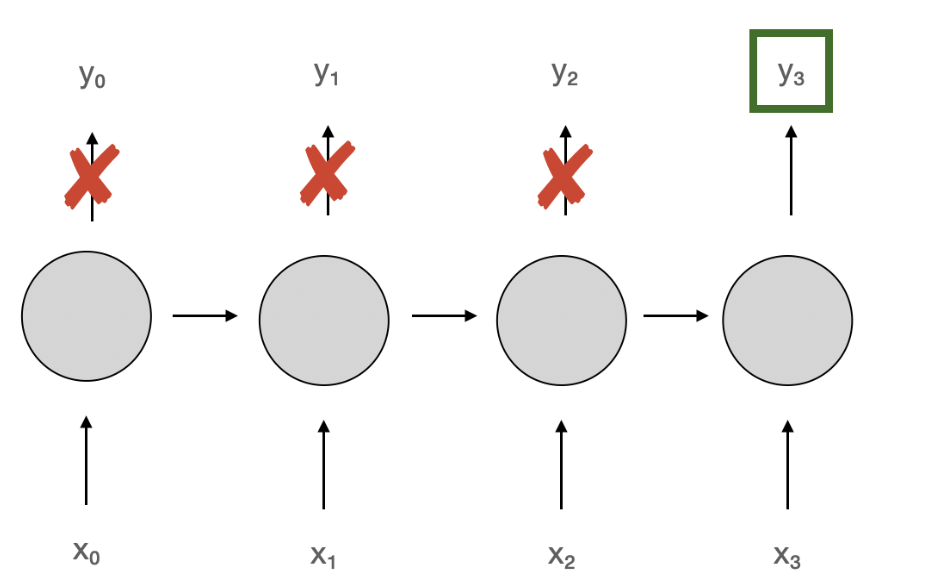

#### Vector-to-sequence architecture
Pass single input, use the entire output sequence
- Example: **Text generation**

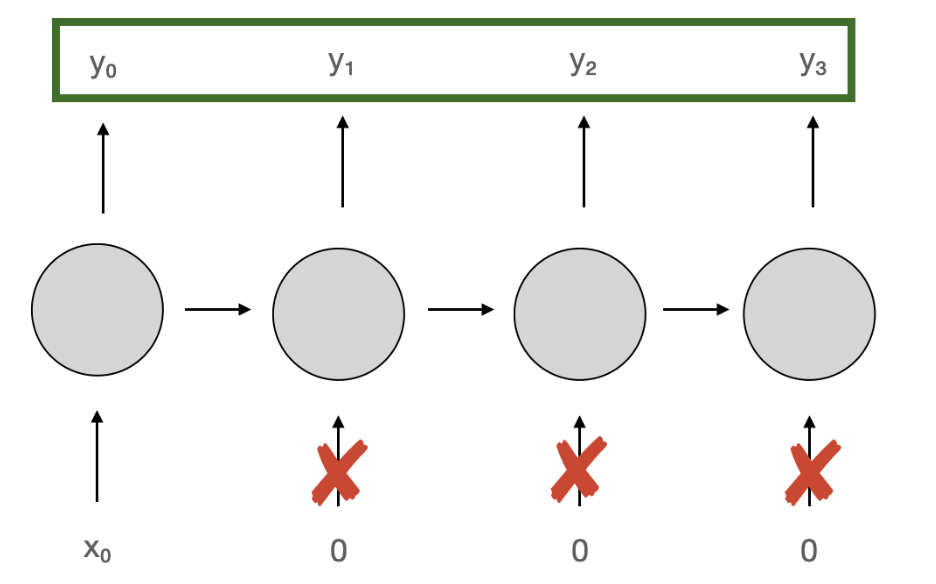

#### Encoder-decoder architecture
Pass entire input sequence, only then start using output sequence
- Example: **Machine translation**

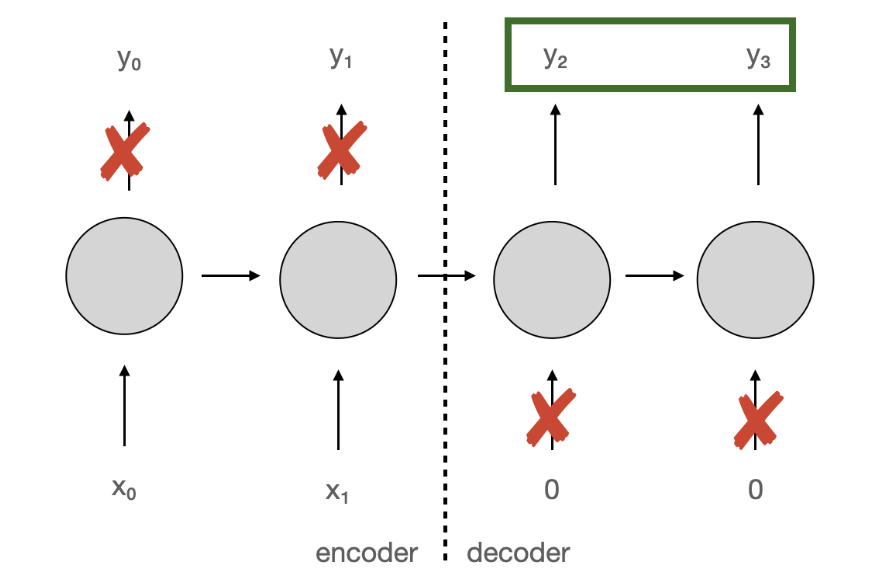

#### In summary:

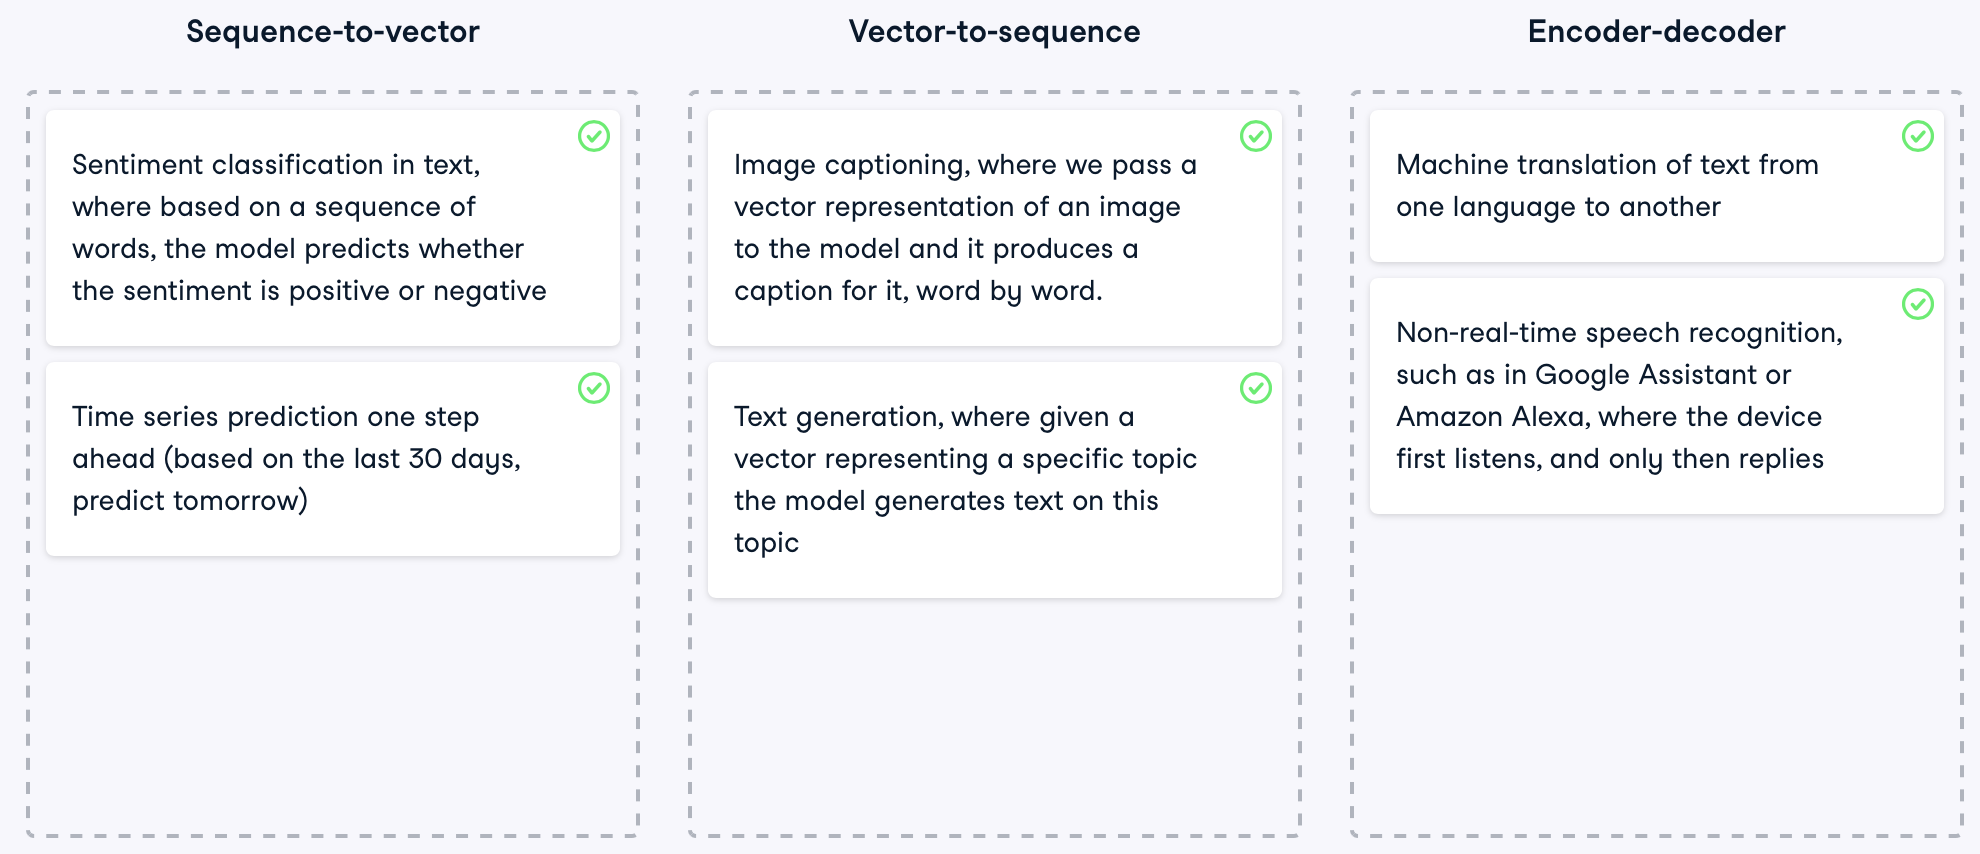

### RNN in PyTorch

In [8]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class Net(nn.Module):
    def __init__(self):
        super().__init__()        
        self.rnn = nn.RNN(            
            input_size=1,            
            hidden_size=32,            
            num_layers=2,            
            batch_first=True,        
        )       
        self.fc = nn.Linear(32, 1)
    
    def forward(self, x):        
        h0 = torch.zeros(2, x.size(0), 32)        
        out, _ = self.rnn(x, h0)        
        out = self.fc(out[:, -1, :])
        
        return out

- Define model class with `__init__` method
- Define recurrent layer, `self.rnn`
- Define linear layer, `fc`
- In `forward()`, initialize first hidden state tozeros
- Pass input and first hidden state through RNN layer
- Select last RNN's output and pass itthrough linear layer

In [9]:
# training ver 2

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Define RNN layer
        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        # Initialize first hidden state with zeros
        h0 = torch.zeros(2, x.size(0), 32)
        # Pass x and h0 through recurrent layer
        out, _ = self.rnn(x, h0)  
        # Pass recurrent layer's last output through linear layer
        out = self.fc(out[:, -1, :])
        return out

### LSTM and GRU Cells

#### Short-term Memory Problem
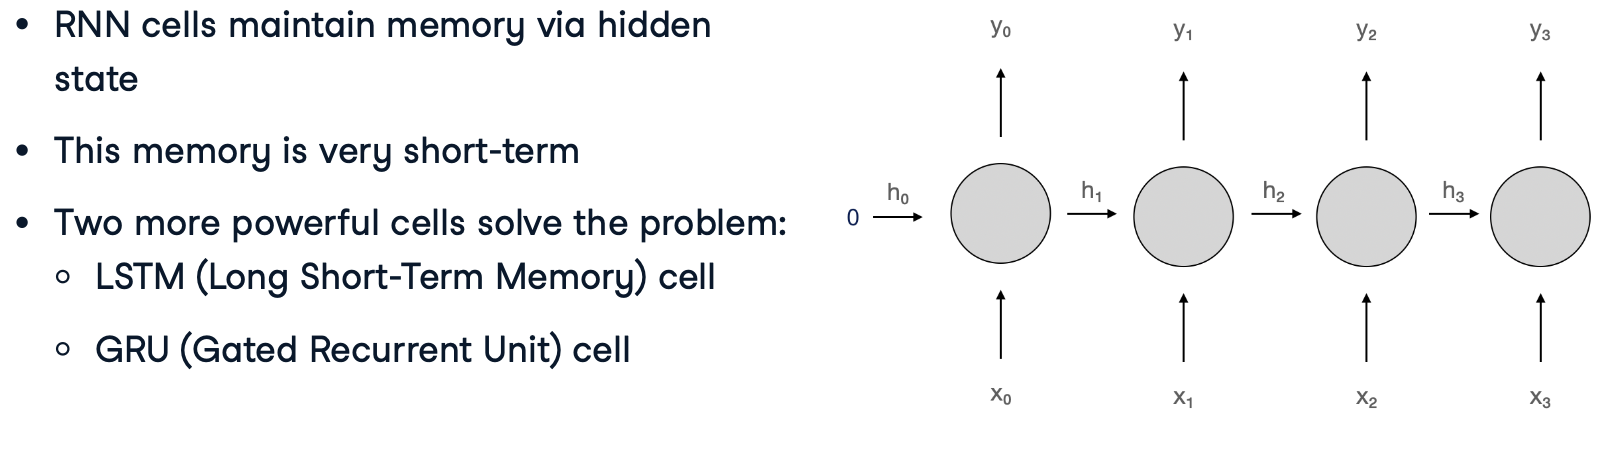

#### RNN Cell
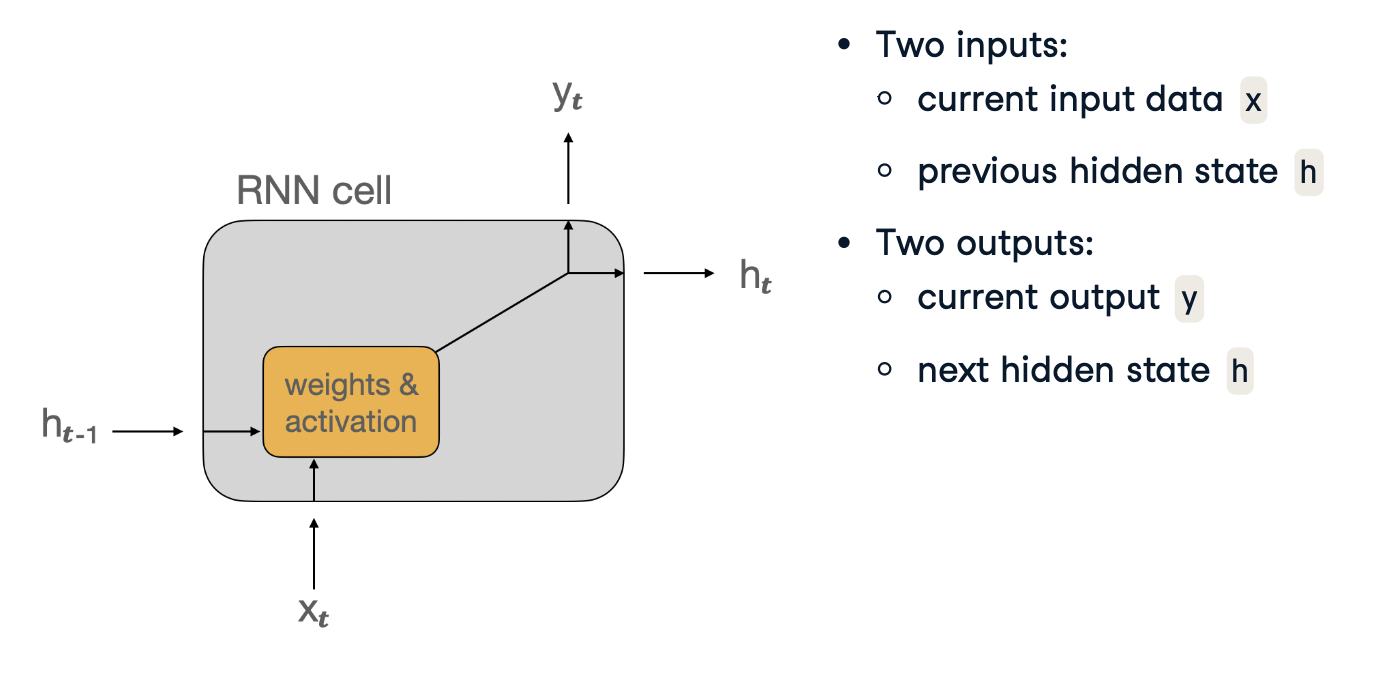

#### LSTM Cell
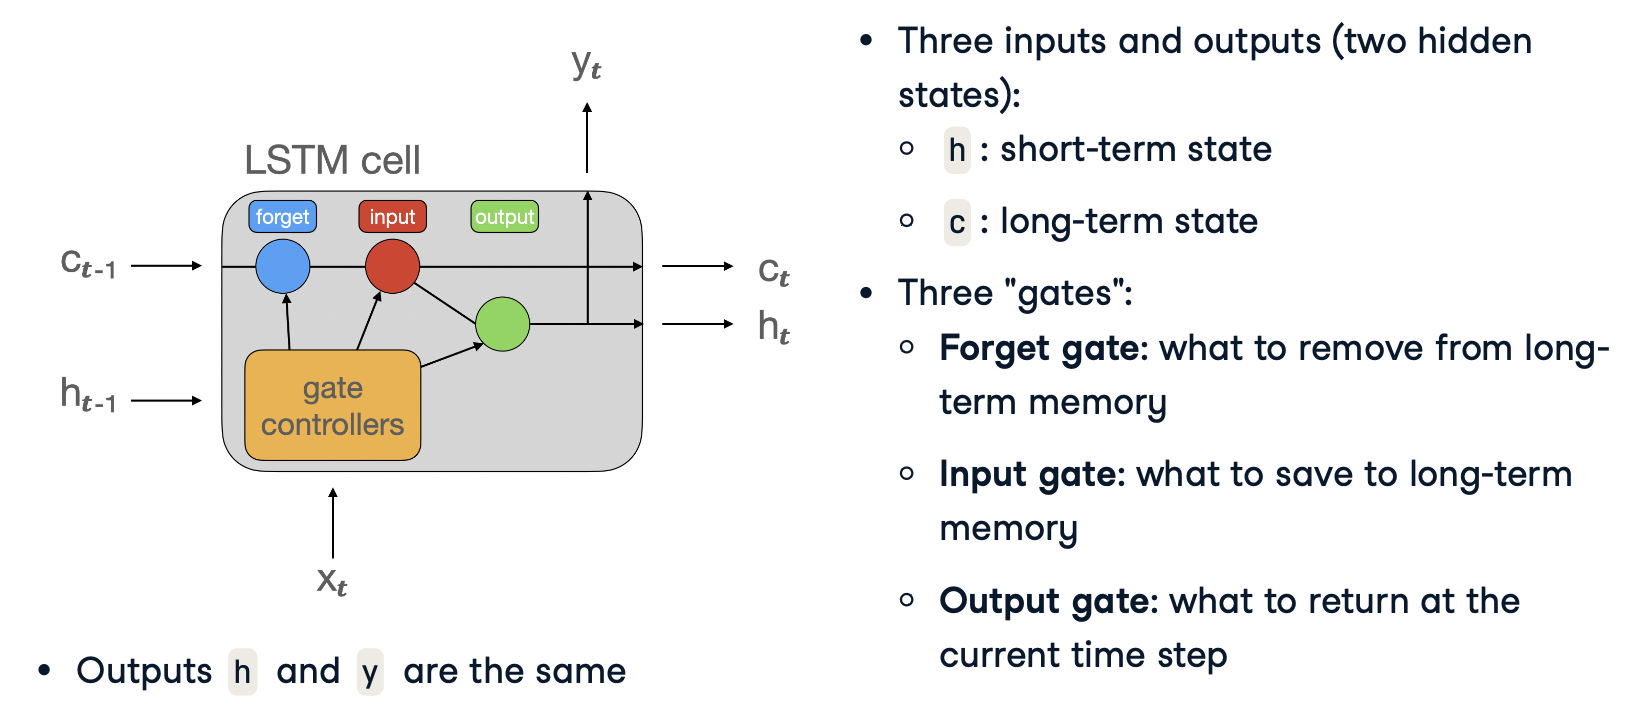

### LSTM in PyTorch

In [10]:
class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()        
        self.lstm = nn.LSTM(          
            input_size=1,           
            hidden_size=32,            
            num_layers=2,           
            batch_first=True,        
        )        
        self.fc = nn.Linear(32, 1)
    
    def forward(self, x):        
        h0 = torch.zeros(2, x.size(0), 32)       
        c0 = torch.zeros(2, x.size(0), 32)        
        out, _ = self.lstm(x, (h0, c0))        
        out = self.fc(out[:, -1, :])
        
        return out

- `__init__()`:
  - Replace `nn.RNN` with `nn.LSTM`<br><br>

- `forward()`:
  - Add another hidden state `c`
  - Initialize `c` and `h` with zeros
  - Pass both hidden states to `lstm` layer

### GRU Cell
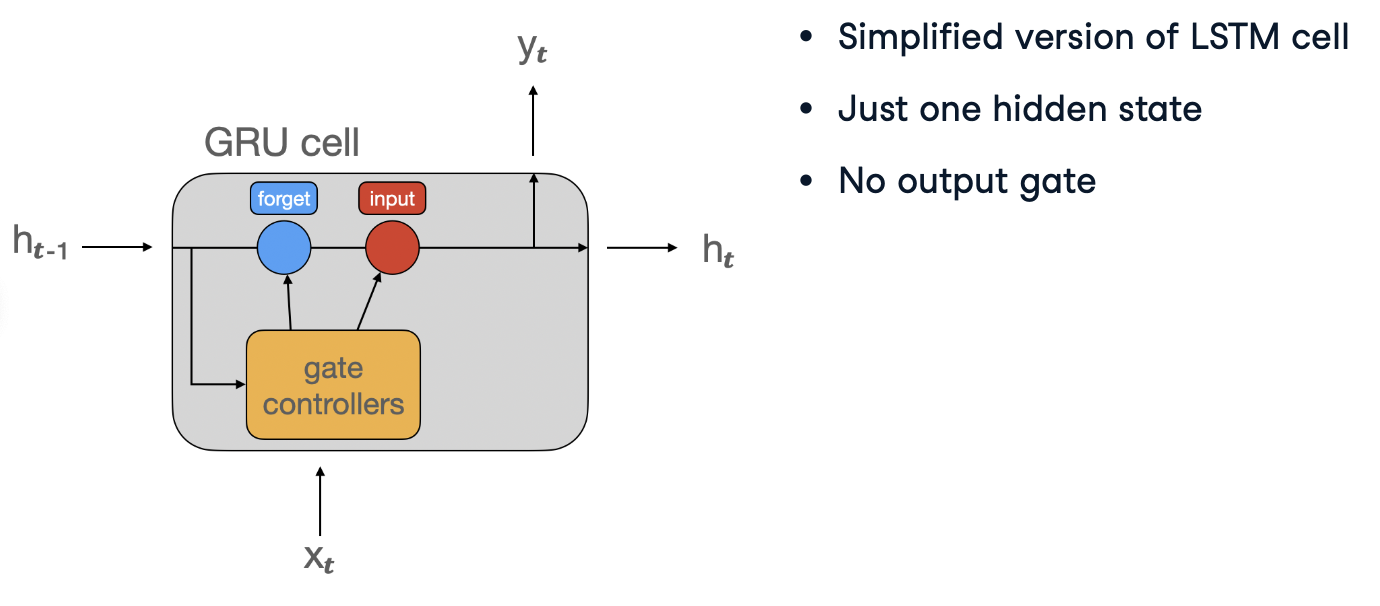

### GRU in PyTorch

In [11]:
class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()        
        self.gru = nn.GRU(            
            input_size=1,            
            hidden_size=32,           
            num_layers=2,            
            batch_first=True,       
        )        
        self.fc = nn.Linear(32, 1)
    
    def forward(self, x):        
        h0 = torch.zeros(2, x.size(0), 32)        
        out, _ = self.gru(x, h0)        
        out = self.fc(out[:, -1, :])
        
        return out

- `__init__()`:
  - Replace `nn.RNN` with `nn.GRU`<br><br>

- `forward()`:
  - Use the `gru` layer<br><br>

# Should I Use RNN, LSTM, or GRU?
- RNN is not used much anymore
- GRU is simpler than LSTM = less computation
- Relative performance varies per use-case
- Try both and compare

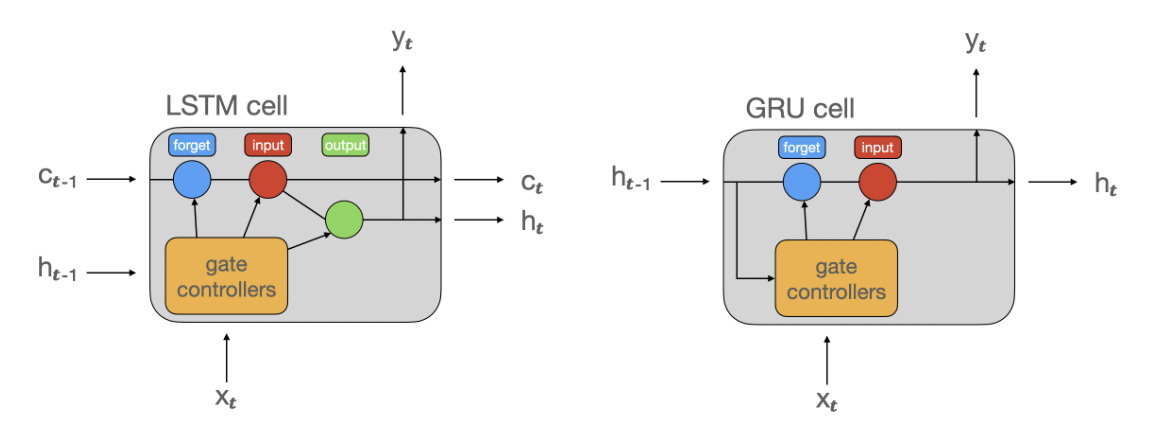

In [12]:
# training ver 3

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        # Define lstm layer
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        # Initialize long-term memory
        c0 = torch.zeros(2, x.size(0), 32)
        # Pass all inputs to lstm layer
        out, _ = self.lstm(x, (h0, c0)) 
        out = self.fc(out[:, -1, :])
        return out

In [13]:
# training ver 4

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Define RNN layer
        self.gru = nn.GRU(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        out, _ = self.gru(x, h0)  
        out = self.fc(out[:, -1, :]) 
        return out

### Training and Evaluating RNNs

#### Mean Squared Error Loss
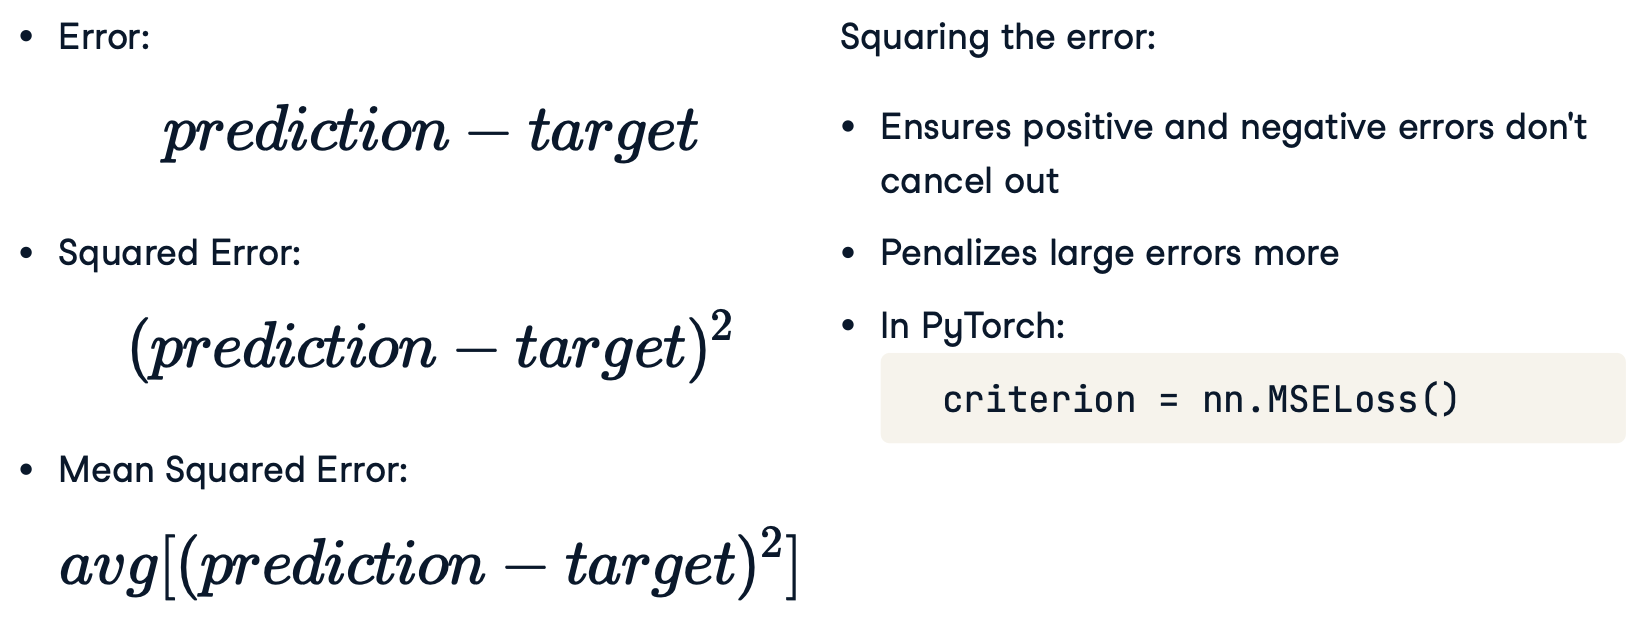

#### Expanding Tensors
- Recurrent layers expect input shape `(batch_size, seq_length, num_features)`
- We got `(batch_size, seq_length)`
- We must add one dimension at the end

In [14]:
from torch.utils.data import DataLoader, TensorDataset

# Creating test data
test_df = pd.read_csv('electricity_consump/electricity_test.csv')

X_test, y_test = create_sequences(test_df, seq_length)

dataset_test = TensorDataset(    
    torch.from_numpy(X_test).float(),    
    torch.from_numpy(y_test).float(),
)

# Create DataLoaders
dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=32)

In [15]:
class LSTMNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=32, num_layers=2, batch_first=True)
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        c0 = torch.zeros(2, x.size(0), 32)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

class GRUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=32, num_layers=2, batch_first=True)
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [16]:
for seqs, labels in dataloader_train:
    print(seqs.shape)

torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([32, 96])
torch.Size([3

In [17]:
seqs = seqs.unsqueeze(-1) # add one dimension
print(seqs.shape)

torch.Size([31, 96, 1])


#### Squeezing Tensors
- In evaluation loop, we need to revert the reshaping done in the training loop
- Labels are of shape `(batch_size)`

In [ ]:
for seqs, labels in dataloader_test:
    print(labels.shape)

- Model outputs are `(batch_size, 1)`

In [ ]:
seqs = seqs.unsqueeze(-1)
out = net(seqs)

- Shapes of model outputs and labels must match for the loss function
- We can drop the last dimension from model outputs

In [ ]:
out = net(seqs).squeeze()

### Training Loop

In [23]:
# net = Net()

# criterion = nn.MSELoss()
# optimizer = optim.Adam(  
#     net.parameters(), lr=0.001)

# num_epochs = 3

# for epoch in range(num_epochs):
#     net.train()
#     epoch_loss = 0.0
#     for seqs, labels in dataloader_train:        
#         seqs = seqs.unsqueeze(-1)
#         labels = labels.unsqueeze(1)
#         outputs = net(seqs)        
#         loss = criterion(outputs, labels)        
#         optimizer.zero_grad()       
#         loss.backward()       
#         optimizer.step()

#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

- Instantiate model, define loss & optimizer
- Iterate over epochs and data batches
- Reshape input sequence
- The rest: as usual

### Evaluation Loop

In [ ]:
mse = torchmetrics.MeanSquaredError()
net.eval()

with torch.no_grad():
    for seqs, labels in test_loader:        
        seqs = seqs.view(32, 96, 1)        
        outputs = net(seqs).squeeze()       
        mse(outputs, labels)

print(f"Test MSE: {mse.compute()}")

- Set up MSE metric
- Iterate through test data with no gradients
- Reshape model inputs
- Squeeze model outputs
- Update the metric
- Compute final metric value

Epoch [1/10], Loss: 17.62339826
Epoch [2/10], Loss: 9.80391196
Epoch [3/10], Loss: 9.19257184
Epoch [4/10], Loss: 8.48021233
Epoch [5/10], Loss: 8.01768074
Epoch [6/10], Loss: 7.74984599
Epoch [7/10], Loss: 7.52146588
Epoch [8/10], Loss: 7.33802769
Epoch [9/10], Loss: 7.18033506
Epoch [10/10], Loss: 7.07907830

Test Loss (MSE): 2.28276252


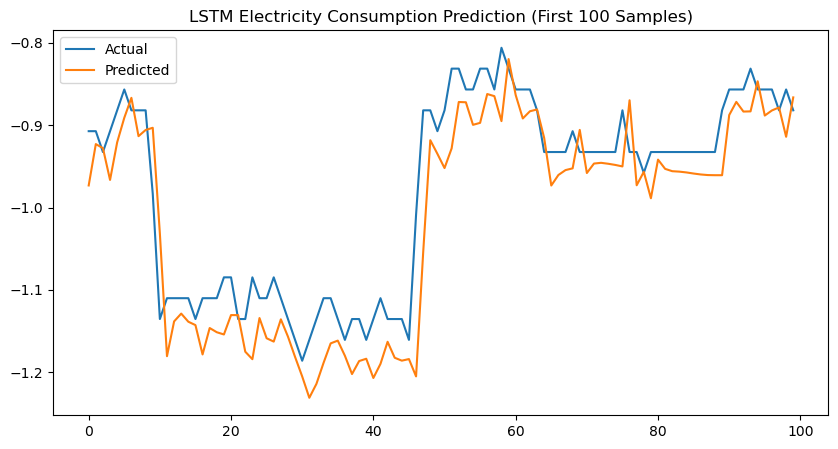

In [22]:
# --- IMPORTS ---
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# --- DEVICE ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- LOAD TRAINING DATA ---
train_df = pd.read_csv('electricity_consump/electricity_train.csv')
train_values = train_df.iloc[:, 1].values.reshape(-1, 1)

# --- NORMALIZE ---
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_values)

# --- CREATE SEQUENCES ---
seq_length = 24

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X_train, y_train = create_sequences(train_scaled, seq_length)

# --- TENSORS & DATALOADER ---
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader_train = DataLoader(train_dataset, batch_size=32, shuffle=True)

# --- MODEL ---
class LSTMNet(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=2):
        super(LSTMNet, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32).to(x.device)
        c0 = torch.zeros(2, x.size(0), 32).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# --- TRAIN ---
model = LSTMNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for seqs, labels in dataloader_train:
        seqs = seqs.to(device)
        labels = labels.to(device)

        outputs = model(seqs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.8f}")

# --- LOAD AND NORMALIZE TEST DATA ---
test_df = pd.read_csv('electricity_consump/electricity_test.csv')
test_values = test_df.iloc[:, 1].values.reshape(-1, 1)
test_scaled = scaler.transform(test_values)  # Use the SAME scaler from training

X_test, y_test = create_sequences(test_scaled, seq_length)

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
dataloader_test = DataLoader(test_dataset, batch_size=32)

# --- EVALUATE ON TEST DATA ---
model.eval()
with torch.no_grad():
    total_loss = 0.0
    all_preds = []
    all_labels = []

    for seqs, labels in dataloader_test:
        seqs = seqs.to(device)
        labels = labels.to(device)

        outputs = model(seqs)
        loss = criterion(outputs, labels)

        total_loss += loss.item()
        all_preds.append(outputs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

    print(f"\nTest Loss (MSE): {total_loss:.8f}")

# --- OPTIONAL: INVERSE TRANSFORM AND PLOT ---
import matplotlib.pyplot as plt

# Flatten and inverse scale predictions
preds = np.concatenate(all_preds, axis=0)
labels = np.concatenate(all_labels, axis=0)

preds_orig = scaler.inverse_transform(preds)
labels_orig = scaler.inverse_transform(labels)

plt.figure(figsize=(10,5))
plt.plot(labels_orig[:100], label='Actual')
plt.plot(preds_orig[:100], label='Predicted')
plt.legend()
plt.title('LSTM Electricity Consumption Prediction (First 100 Samples)')
plt.show()